In [3]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [0]:
from typing import Callable, List, Tuple, Union

from keras.layers import Dense, Input, Layer
from keras import Model


def _architecture_builder(input_shape: Tuple, output_shape: int, neurons: List[int]) -> List[Layer]:
    layers = [Input(input_shape)]
    for n in neurons:
        layers.append(Dense(n, activation='relu'))
    layers.append(Dense(output_shape, activation='sigmoid'))
    return layers


def _model_builder(layers: List[Layer]) -> Model:
    inputs = layers[0]
    layer = layers[1](inputs)
    for l in layers[2:]:
        layer = l(layer)
    model = Model(inputs, layer)
    return model


def dense_encoder_decoder(input_shape: Tuple, output_shape: int, encoder_size: int, neurons: List[int],
                          optimizer: Union[Callable, str] = 'adam', loss: Union[Callable, str] = 'mse')\
        -> Tuple[Model, Model, Model]:

    encoder_layers = _architecture_builder(input_shape, encoder_size, neurons)
    decoder_layers = _architecture_builder((encoder_size,), output_shape, neurons[::-1])
    encoder_decoder_layers = encoder_layers + decoder_layers[1:]
    encoder = _model_builder(encoder_layers)
    decoder = _model_builder(decoder_layers)
    encoder_decoder = _model_builder(encoder_decoder_layers)
    encoder_decoder.compile(optimizer=optimizer, loss=loss)
    return encoder_decoder, encoder, decoder

In [5]:
autoencoder, encoder, decoder = dense_encoder_decoder((784,), 784, 32, [784,128,64])

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 29s 487us/step - loss: 0.3046 - val_loss: 0.2582
Epoch 2/50
60000/60000 [==============================] - 29s 480us/step - loss: 0.2547 - val_loss: 0.2526
Epoch 3/50
60000/60000 [==============================] - 29s 485us/step - loss: 0.2515 - val_loss: 0.2503
Epoch 4/50
60000/60000 [==============================] - 28s 473us/step - loss: 0.2482 - val_loss: 0.2463
Epoch 5/50
60000/60000 [==============================] - 29s 487us/step - loss: 0.2433 - val_loss: 0.2414
Epoch 6/50
60000/60000 [==============================] - 29s 478us/step - loss: 0.2399 - val_loss: 0.2387
Epoch 7/50
60000/60000 [==============================] - 28s 474us/step - loss: 0.2375 - val_loss: 0.2366
Epoch 8/50
60000/60000 [==============================] - 29s 489us/step - loss: 0.2356 - val_loss: 0.2353
Epoch 9/50
60000/60000 [======================

In [8]:

encoded_imgs = encoder.predict(x_test)
predicted = autoencoder.predict(x_test)

import random
x=np.random.rand(10, 32)
x=x*255
# for i in range(100):
#   for j in range(100):
#     x[j+100*i][0]=i*0.01
#     x[j+100*i][1]=j*0.01
print(x)
generated = decoder.predict(x)


[[ 64.53618432 207.24291337 134.78625906 178.97178266 148.15881631
  216.50278885 126.70838541  91.01082283 212.68777301  48.21549942
  183.70736916 148.79475401 205.36950363 142.36080187  18.54023308
   40.69537909 192.2260276  162.01089487   1.1036353  167.8927077
  137.3047737   37.13409146 157.12787678 202.33111322  10.71725491
  208.87750048   3.16206959 254.77110648 102.93371937  70.34961316
  157.21370811 228.53489275]
 [ 42.47724662  76.98867298 216.47796376 105.17925806 135.16838427
   50.4550098  134.82925287  85.86875874   9.98305815 233.68242144
  200.25357937  33.55809686  70.18242841 145.39570491  24.9241822
   44.86244869 110.46466594  88.75172202 254.54069013 146.06989133
  192.84163079  61.48299586 242.21655565 120.45776523  60.65627859
  131.38294397  65.26933486 121.49172825 181.55470922  70.21933111
   42.8304281    7.76769613]
 [ 68.97462805  20.65846277  29.4074542  109.08218111  20.93047693
  135.61922366  35.92936     96.66911337 152.54486684 180.6185979
  240.1

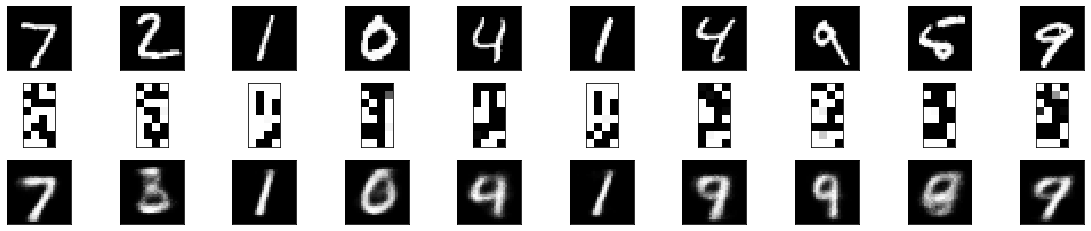

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded images
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    
plt.show()

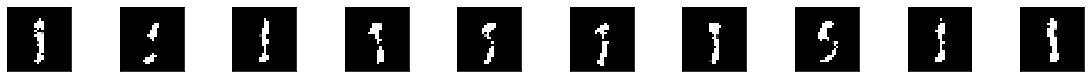

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(generated[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)